### Data Preparation
- We import Numpy for matrix operations and Matplotlib for plotting graphs and visualizing images.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Defining the Pixel Patterns
- In This I have defined the pixel patterns for A,B and C. Each letter is represented in a 5x6 grid, flattened into a 1D list of 30 elements

In [26]:
A = [0,0,1,1,0,0,
     0,1,0,0,1,0,
     1,1,1,1,1,1,
     1,0,0,0,0,1,
     1,0,0,0,0,1]

B = [1,1,1,1,1,0,
     1,0,0,0,0,1,
     1,1,1,1,1,0,
     1,0,0,0,0,1,
     1,1,1,1,1,0]

C = [0,1,1,1,1,1,
     1,0,0,0,0,0,
     1,0,0,0,0,0,
     1,0,0,0,0,0,
     0,1,1,1,1,1]

# In above array I have created a array where 0's are blank spaces and 1's are pixel for characters

### Inputs (x) and Ouputs (y)
- x contains the pixel data of the letters.
- y is the one-hot encoded label:
  - [1, 0, 0] for A
  - [0, 1, 0] for B
  - [0, 0, 1] for C 

In [4]:
x = np.array([A, B, C])
y = np.array([[1,0,0],
              [0,1,0],
              [0,0,1]])

### Neural Network Parameters
- The network has:
  - 30 inputs(pixels)
  - 10 neurons in the hidden layers
  - 3 outputs ( one for each letter)
  - Learning rate of 0.1 for weight updates
  - 1000 epochs for training

In [5]:
input_size = 30
hidden_size = 10
output_size = 3
learning_rate = 0.1
epochs = 1000

### Weight Initialization
- I have initialized:
  - W1, W2: Random weights for the connections
  - b1, b2: Bias terms intialzed to zero

In [6]:
np.random.seed(30)
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

### Activation Function and Its Derivative
- sigmoid is used as the activation function. 
- Its derivative is required for backpropagation

In [7]:
def sigmoid(x):
    return 1 / ( 1 + np.exp( -x ) )

def sigmoid_derivative(x):
    return x * ( 1 - x )

### Forward Propogation Logic
- Forward Propogation steps:
  - z1 : Linear combination of inputs and weights for the hidden layer.
  - a1 : Apply sigmoid to z1 (activation output)
  - z2 : Linear combination for the output layer
  - a2 : Final perdiction after applying sigmoid

In [ ]:
def forward_propagation(X):
    z1 = np.dot(x, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)
    return z1, a1, z2, a2

### Loss Function
- I have used the Mean Squared Error (MSE) to measure the diffrence between predicted and actual outputs.

In [11]:
def computed_loss (y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

### Backpropogation Logic
- This is where the most logic takes place :
  - Calculating the error for the output
  - Propoagate the error back to the hidden layer
  - Update the weights and biases based on the gradient

In [ ]:
def back_propagation (x, y, z1, a1, z2, a2):
    global W1, b1, W2, b2

    #Output Layer error
    error_output = a2 - y
    delta_output = error_output *sigmoid_derivative(a2)

    #Hidden layer error
    error_hidden = np.dot(delta_output, W2.T)
    delta_hidden = error_hidden * sigmoid_derivative(a1)

    #Update weights and biases
    W2 -= learning_rate *np.dot(a1.T, delta_output)
    b2 -= learning_rate *np.sum(delta_output, axis = 0, keepdims=True)
    W1 -= learning_rate *np.dot(x.T, delta_hidden)
    b1 -= learning_rate *np.sum(delta_hidden, axis = 0, keepdims=True)

### Training Loop
- Perform forward propagation
- Compute the loss 
- Run backpropagation
- Store the loss to plot later

In [17]:
losses = []
for epoch in range (epochs):
    z1,a1,z2,a2 = forward_propagation(x)
    loss = computed_loss(y, a2)
    losses.append(loss)
    back_propagation(x, y, z1,a1,z2,a2)

### Plotting Loss Curve
- Visualize how to the loss decrease over time, indicating learning.

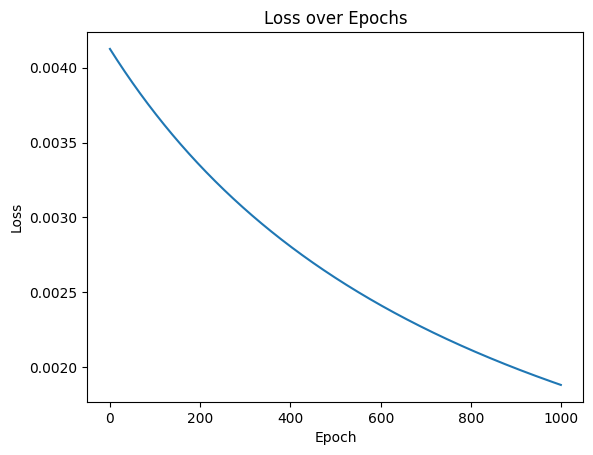

In [18]:
plt.plot(losses)
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

### Prediction and Display Logic
- The predict function
  - Runs forward propagation for the given image
  - Determines the class (A, B, or C)
  - Displays the images and the predicted label.

In [22]:
def predict(image):
    _, _, _, output = forward_propagation(image.reshape(1,-1))
    prediction = np.argmax(output, axis=1)
    labels = ['A','B','C']
    plt.imshow(image.reshape(5, 6), cmap ='gray')
    plt.title(f"Predicted:{labels[prediction[0]]}")
    plt.show()

### Testing
- Now we run the prediction for each letter and display the results

Testing Predictions


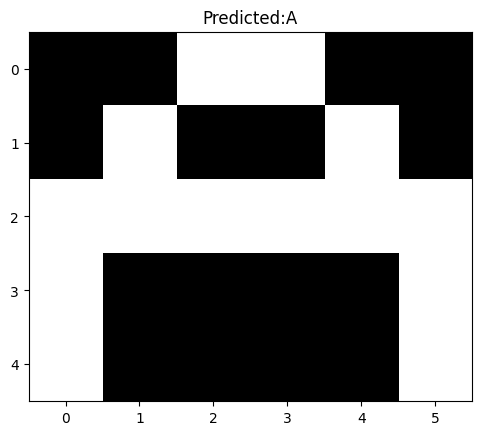

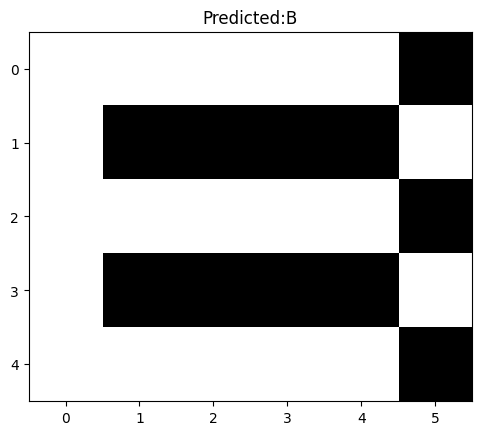

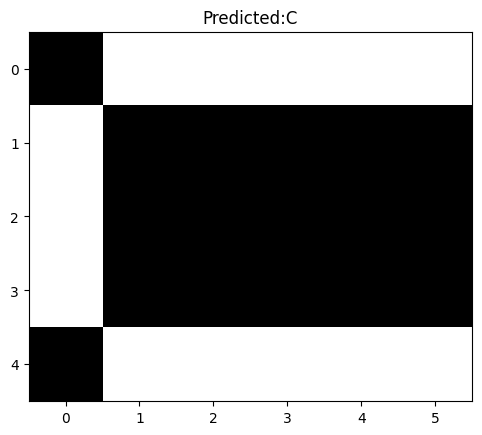

In [27]:
print("Testing Predictions")
predict(np.array(A))
predict(np.array(B))
predict(np.array(C))